# Linear regression (nearly) from scratch in `PyTorch`: fitting a linear map with a linear map
## Goal
To approximate a linear map
$$ y = b+mx$$
with another linear map
$$ y = \hat b +\hat mx\,.$$

## Optimization
The optimization method is by gradient descent.

## Note: minimal `PyTorch`
This notebook uses minimal `PyTorch` functionalities in the sense that it only uses the `backward()` function.  Otherwise everything else could be implemented in `Numpy`.

# References
- [Linear regression with pytorch](https://medium.com/jovianml/linear-regression-with-pytorch-3dde91d60b50) (Aaakash N S on Medium)

---
tags: pytorch, tutorial, linear regression, function approximation, minimal

# Imports

In [1]:
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

# Helper functions

In [2]:
def mse(preds, targs):
    return ((preds - targs)**2).sum()

# Initialization

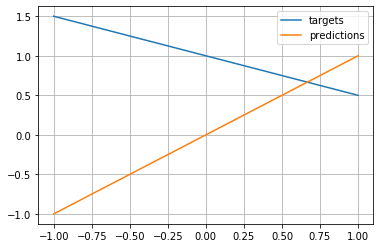

In [3]:
# Data
w = -.5
b = 1
x = torch.linspace(-1, 1, 21).view(-1, 1)
targs = w*x + b

# Model: linear regressor
w0 = 1.
b0 = 0.
linear = nn.Linear(1, 1)
linear.weight.data = torch.tensor([w0]).reshape(1,1)
linear.bias.data = torch.tensor([b0])

# Predictions
preds = linear.forward(x)

# Plot
plt.plot(x, targs, label='targets');
plt.plot(x, preds.data.detach().numpy(), label='predictions')
plt.legend();
plt.grid();

In [4]:
lr = .01
preds = linear.forward(x)
loss = mse(preds, targs)
w = linear.weight.item()
b = linear.bias.item()

losses = [loss]
weights = [w]
biases = [b]

# Iteration

In [5]:
for _ in range(20):
    for param in linear.parameters():
        if param.grad is not None:
            param.grad.zero_()
    loss = mse(preds, targs)
    losses.append(loss.item())

    loss.backward()
    for param in linear.parameters():
        with torch.no_grad():
            param -= lr*param.grad.item()
    weights.append(linear.weight.item())
    biases.append(linear.bias.item())

    preds = linear.forward(x)

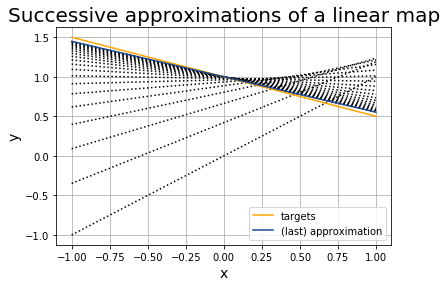

In [6]:
for w, b in zip(weights, biases):
    preds = w*x+b
    
    plt.plot(x, preds, 'k:')
plt.plot(x, targs, 'Orange', label='targets')
plt.plot(x, preds, 'xkcd:cobalt', label='(last) approximation')

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Successive approximations of a linear map", fontsize=20);
plt.legend();
plt.grid();

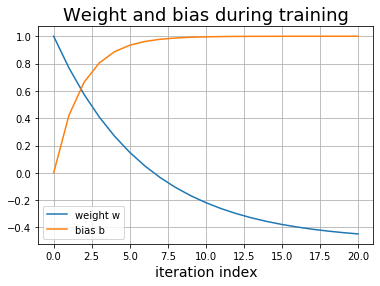

In [7]:
plt.plot(weights, label='weight w')
plt.plot(biases, label='bias b')
plt.grid();
plt.legend();
plt.xlabel("iteration index", fontsize=14);
plt.title("Weight and bias during training", fontsize=18);

In [8]:
assert False

AssertionError: 

# One iteration
The following cell goes through a single iteration.

In [ ]:
# Set gradients to zero (for safety)
for param in linear.parameters():
    if param.grad is not None:
        param.grad.zero_()
    
    
# Compute loss
loss = mse(preds, targs)
losses.append(loss.item())

# Compute gradient
loss.backward()


# Update weights
for param in linear.parameters():
    with torch.no_grad():
        param -= lr*param.grad.item()
weights.append(linear.weight.item())
biases.append(linear.bias.item())
        
# Compute new predictions
preds = linear.forward(x)

# Plot
plt.plot(x, targs, label='targets');
plt.plot(x, preds.data.detach().numpy(), label='predictions')
plt.legend();
plt.grid();
plt.title("Updated predictions", fontsize=22);